In [1]:
import pandas as pd
import numpy as np

In [2]:
historical_SNAP_stores = pd.read_csv('historical_snap_data.csv')
historical_SNAP_stores.head()

,Record ID,Store Name,Store Type,Street Number,Street Name,Additional Address,City,State,Zip Code,Zip4,County,Latitude,Longitude,Authorization Date,End Date
0,785740,ADAK GENERAL STORE,Convenience Store,42311,FINGER BAY RD,,ADAK,AK,99546,2036,ALEUTIANS EAST,51.84434,-176.6284,05/08/2006,03/01/2016
1,512036,Alaska Commercial Company 325,Combination Grocery/Other,1,BAYVIEW DR,,KING COVE,AK,99612,,ALEUTIANS EAST,55.05876,-162.3134,02/02/1999,
2,758776,Alaska Commercial Company 220,Combination Grocery/Other,100,Main St,NaN,Sand Point,AK,99661,9800,ALEUTIANS EAST,55.33546,-160.4955,07/05/2005,
3,672376,ALEUTIAN COMMERCIAL CO,Combination Grocery/Other,100,MAIN,,SAND POINT,AK,99661,,ALEUTIANS EAST,0.00000,0.0000,01/26/1973,07/29/1993
4,309052,ALEUTIAN COMMERCIAL CO INC,Large Grocery Store,100,MAIN ST,,SAND POINT,AK,99661,,ALEUTIANS EAST,55.30257,-160.4045,07/28/1993,07/11/2005


In [3]:
def find_empty_row(dataframe, column):
    # Identify the column to check
    column_to_check = column

    # Use `apply` with a lambda function to check for non-string values
    non_string_mask = ~dataframe[column].apply(lambda x: isinstance(x, str))
    
    # Filter the DataFrame to get rows with non-string values
    non_string_rows = dataframe[non_string_mask]
    
    # Display the rows with non-string values
    print(non_string_rows)

def fill_empty_row(dataframe, column, string):
    dataframe[column] = dataframe[column].fillna(string)

def text_cleaning(dataframe, column):
    
    dataframe[column] = dataframe[column].apply(lambda x: x.strip() if isinstance(x, str) else x)
    dataframe[column] = dataframe[column].str.lower()
    return dataframe


In [4]:
historical_SNAP_stores.columns

Index(['Record ID', 'Store Name', 'Store Type', 'Street Number', 'Street Name',
       'Additional Address', 'City', 'State', 'Zip Code', 'Zip4', 'County',
       'Latitude', 'Longitude', 'Authorization Date', 'End Date'],
      dtype='object')

In [5]:
from pandas.api.types import is_string_dtype
is_string_dtype(historical_SNAP_stores['End Date'])

True

In [6]:
#finding all existing stores because they don't have an end date
current_SNAP_stores = historical_SNAP_stores[(historical_SNAP_stores['End Date'] == " ")]
current_SNAP_stores.head()

,Record ID,Store Name,Store Type,Street Number,Street Name,Additional Address,City,State,Zip Code,Zip4,County,Latitude,Longitude,Authorization Date,End Date
1,512036,Alaska Commercial Company 325,Combination Grocery/Other,1,BAYVIEW DR,,KING COVE,AK,99612,,ALEUTIANS EAST,55.05876,-162.3134,02/02/1999,
2,758776,Alaska Commercial Company 220,Combination Grocery/Other,100,Main St,NaN,Sand Point,AK,99661,9800,ALEUTIANS EAST,55.33546,-160.4955,07/05/2005,
6,798888,BEARFOOT INN ALASKA,Medium Grocery Store,123,BEAR COUNTRY RD,,COLD BAY,AK,99571,,ALEUTIANS EAST,55.11747,-162.7780,09/06/2006,
10,446970,John Gould & Sons Co,Convenience Store,7,HEARTLAKE DR,,KING COVE,AK,99612,,ALEUTIANS EAST,55.05978,-162.3126,04/20/2010,
12,517007,MCGLASHAN STORE,Convenience Store,101,Salmon Berry Rd,,Akutan,AK,99553,9800,ALEUTIANS EAST,54.13445,-165.7735,04/19/1982,


In [7]:
#finding stores in Texas based on state and making it into csv
texas_SNAP_stores = current_SNAP_stores[current_SNAP_stores['State'] == "TX"]
texas_SNAP_stores.head()
texas_SNAP_stores.to_csv('texas_SNAP_stores.csv')

In [11]:
#creating dataframe with all SNAP stores in Dallas county
dallas_SNAP_stores = texas_SNAP_stores[texas_SNAP_stores["County"] == "DALLAS"]
dallas_SNAP_stores

,Record ID,Store Name,Store Type,Street Number,Street Name,Additional Address,City,State,Zip Code,Zip4,County,Latitude,Longitude,Authorization Date,End Date
857798,1408751,1 Quickstop,Convenience Store,3525,W Ledbetter Dr,NaN,Dallas,TX,75233,3809,DALLAS,32.69171,-96.87895,06/18/2020,
857799,1442210,1 St Stop,Convenience Store,4100,Gus Thomasson Rd,NaN,Mesquite,TX,75150,2226,DALLAS,32.82010,-96.64152,04/07/2021,
857800,1087515,1 Star Beverage,Combination Grocery/Other,510,N Plano Rd,,Garland,TX,75042,5908,DALLAS,32.91725,-96.70021,03/01/2013,
857816,1366471,1 Stop Mart,Convenience Store,8460,Denton Dr,,Dallas,TX,75235,3135,DALLAS,32.84155,-96.85843,06/14/2019,
857827,1467104,1st Choice Grocery,Convenience Store,8122,Forest Ln,Ste A,Dallas,TX,75243,3949,DALLAS,32.90894,-96.76462,09/15/2021,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
864409,776038,ZAM ZAM SUPERMARKET,Large Grocery Store,3901,W Northgate Dr,,Irving,TX,75062,1954,DALLAS,32.85711,-97.00259,03/06/2006,
864412,1443631,Zara Food Mart,Convenience Store,1102,E Pioneer Dr,Ste H,Irving,TX,75061,7862,DALLAS,32.81713,-96.93340,04/07/2021,
864419,1488443,Zee Stop Town East Mall 04,Convenience Store,2063,Town East Mall,NaN,Mesquite,TX,75150,4197,DALLAS,32.80852,-96.62629,03/02/2022,
864423,1402593,Zing Oriental Market,Medium Grocery Store,9658,Plano Rd,,Dallas,TX,75238,2923,DALLAS,32.87830,-96.70028,04/09/2020,


In [12]:
#creating dataframe for zipcode 75237
joev_competition = dallas_SNAP_stores[dallas_SNAP_stores["Zip Code"] == 75237]
joev_competition 

,Record ID,Store Name,Store Type,Street Number,Street Name,Additional Address,City,State,Zip Code,Zip4,County,Latitude,Longitude,Authorization Date,End Date
858461,1377647,7-Eleven Convenience Store 38412A,Convenience Store,2935,W Camp Wisdom Rd,,Dallas,TX,75237,2821,DALLAS,32.66259,-96.86828,10/04/2019,
858683,1315160,Abdulkadhem Jamal Alomar,Convenience Store,2984,W Wheatland Rd,Ste E,Dallas,TX,75237,3575,DALLAS,32.64745,-96.86970,03/28/2018,
858740,1318556,Al Food Mart Inc,Convenience Store,7150,Chaucer Pl,Ste 108,Dallas,TX,75237,3154,DALLAS,32.66131,-96.86785,04/23/2018,
858794,941431,Aldi 72,Supermarket,8034,Chrysalis Dr,,Dallas,TX,75237,3613,DALLAS,32.64942,-96.85927,03/04/2010,
858887,1506369,Ann's Health Food Center & Market,Convenience Store,2550,W Red Bird Ln,Ste 207,Dallas,TX,75237,2390,DALLAS,32.67032,-96.85933,07/18/2022,
859231,1407636,Buckhead Meat of Dallas 140,Meat/Poultry Specialty,4216,Mint Way,,Dallas,TX,75237,1608,DALLAS,32.68514,-96.88914,05/26/2020,
859594,1302752,Cool Zone Dallas,Convenience Store,4385,S Westmoreland Rd,Ste 100,Dallas,TX,75237,,DALLAS,32.69053,-96.88133,05/01/2023,
859750,965542,CVS/ PHARMACY INC 296,Combination Grocery/Other,2420,W Wheatland Rd,,Dallas,TX,75237,3609,DALLAS,32.64749,-96.85748,08/10/2010,
859946,1341252,Discount Food Mart,Convenience Store,7491,S Westmoreland Rd,,Dallas,TX,75237,3307,DALLAS,32.65503,-96.88570,11/20/2018,
860087,1370254,Dollar General 20133,Combination Grocery/Other,5775,Blue Bird Ave.,,Dallas,TX,75237,,DALLAS,32.67690,-96.88833,06/26/2019,


In [13]:
#grouping types of stores to see counts of each type
joev_competition.groupby(by='Store Type').count()

,Record ID,Store Name,Street Number,Street Name,Additional Address,City,State,Zip Code,Zip4,County,Latitude,Longitude,Authorization Date,End Date
Store Type,,,,,,,,,,,,,,
Combination Grocery/Other,6,6,6,6,6,6,6,6,6,6,6,6,6,6
Convenience Store,14,14,14,14,9,14,14,14,14,14,14,14,14,14
Meat/Poultry Specialty,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Super Store,2,2,2,2,2,2,2,2,2,2,2,2,2,2
Supermarket,1,1,1,1,1,1,1,1,1,1,1,1,1,1


Text(0, 0.5, 'Number of Stores')

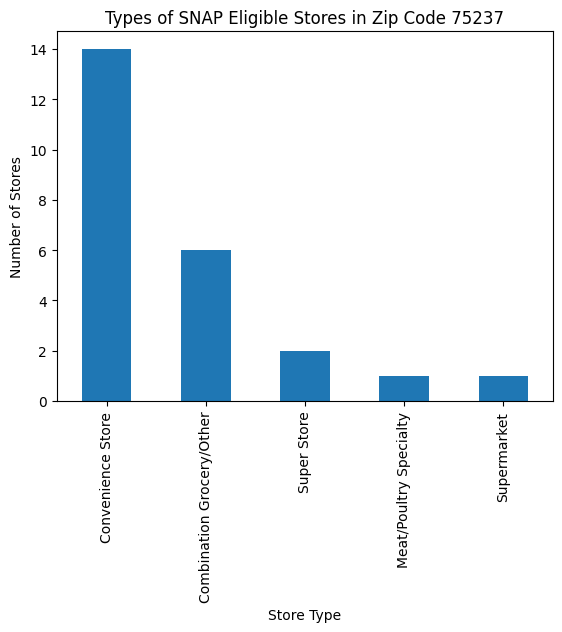

In [14]:
#creating visual of the types of stores and sorting by length of the bars
joev_competition_grouped = joev_competition.groupby(by='Store Type').count()
joev_competition_sorted = joev_competition_grouped.sort_values(by = "Store Name", ascending = False)
joev_graph = joev_competition_sorted['Store Name'].plot.bar()

joev_graph.set_title('Types of SNAP Eligible Stores in Zip Code 75237')
joev_graph.set_ylabel('Number of Stores')

In [15]:
#SNAP stores in zip code 76063
mansfield_heb_competition = current_SNAP_stores[current_SNAP_stores["Zip Code"] == 76063]
mansfield_heb_competition

,Record ID,Store Name,Store Type,Street Number,Street Name,Additional Address,City,State,Zip Code,Zip4,County,Latitude,Longitude,Authorization Date,End Date
897247,1348141,7eleven Convenience Store 38150A,Convenience Store,1200,S Main St,,Mansfield,TX,76063,2737,JOHNSON,32.54733,-97.12582,02/19/2019,
910683,1023060,7-Eleven 26634,Convenience Store,1100,Highway 287 N,,Mansfield,TX,76063,4802,TARRANT,32.58255,-97.13203,10/06/2011,
910910,1406388,7-Eleven Convenience Store 38568A,Convenience Store,2801,Barrington Way,,Mansfield,TX,76063,,TARRANT,32.61329,-97.17699,05/26/2020,
910940,1552617,7-Eleven Convenience Store 41869A,Convenience Store,2501,E Broad St,,Mansfield,TX,76063,,TARRANT,32.56862,-97.10020,07/05/2023,
911141,951141,Aldi 55,Supermarket,3018,Matlock Rd,,Mansfield,TX,76063,3337,TARRANT,32.60759,-97.11600,05/06/2010,
911377,1149513,Big Lots 4532,Combination Grocery/Other,989,N Walnut Creek,,Mansfield,TX,76063,,TARRANT,32.57891,-97.13251,04/30/2014,
911479,751444,BRAUM'S 247,Combination Grocery/Other,1711,Highway 157 N,,Mansfield,TX,76063,3925,TARRANT,32.59291,-97.15026,04/23/2005,
911645,1195999,Carniceria Carmelita,Supermarket,1275,N Hwy 157,Ste 101,Mansfield,TX,76063,1535,TARRANT,32.58243,-97.15167,07/14/2015,
911647,1396915,Carniceria El Matamoros,Convenience Store,2000,Highway 157 N,Ste 110,Mansfield,TX,76063,4860,TARRANT,32.60297,-97.14440,04/06/2020,
911668,732961,CARNITAS MICHOACAN,Small Grocery Store,1016,E Broad St,,Mansfield,TX,76063,1792,TARRANT,32.56543,-97.12857,11/29/2004,


In [16]:
mansfield_heb_competition.groupby(by='Store Type').count()

,Record ID,Store Name,Street Number,Street Name,Additional Address,City,State,Zip Code,Zip4,County,Latitude,Longitude,Authorization Date,End Date
Store Type,,,,,,,,,,,,,,
Bakery Specialty,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Combination Grocery/Other,16,16,16,16,16,16,16,16,16,16,16,16,16,16
Convenience Store,22,22,22,22,17,22,22,22,22,22,22,22,22,22
Meat/Poultry Specialty,1,1,1,1,0,1,1,1,1,1,1,1,1,1
Medium Grocery Store,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Small Grocery Store,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Super Store,6,6,6,6,6,6,6,6,6,6,6,6,6,6
Supermarket,5,5,5,5,5,5,5,5,5,5,5,5,5,5


Text(0, 0.5, 'Number of Stores')

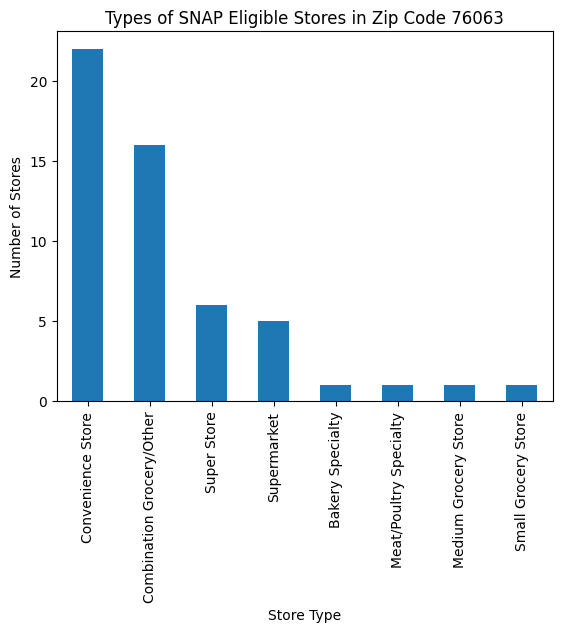

In [17]:
#creating visual of the types of stores and sorting by length of the bars
mansfield_heb_competition_grouped = mansfield_heb_competition.groupby(by='Store Type').count()
mansfield_heb_competition_sorted = mansfield_heb_competition_grouped.sort_values(by = "Store Name", ascending = False)
mansfield_graph = mansfield_heb_competition_sorted['Store Name'].plot.bar()

mansfield_graph.set_title('Types of SNAP Eligible Stores in Zip Code 76063')
mansfield_graph.set_ylabel('Number of Stores')

In [18]:
#creating dataframe for oak cliff zipcodes
oak_cliff = [75203, 75208, 75207]
oak_cliff_competition = current_SNAP_stores[current_SNAP_stores["Zip Code"].isin(oak_cliff)]
oak_cliff_competition

,Record ID,Store Name,Store Type,Street Number,Street Name,Additional Address,City,State,Zip Code,Zip4,County,Latitude,Longitude,Authorization Date,End Date
857836,1514522,24 Seven Mart # 3,Convenience Store,309,S Marsalis Ave,NaN,Dallas,TX,75203,2741,DALLAS,32.74450,-96.81607,08/31/2022,
857869,1413319,6-12 Foood Store,Convenience Store,1221,N Hampton Rd,NaN,Dallas,TX,75208,3001,DALLAS,32.76076,-96.85706,08/06/2020,
857918,1352415,7 Eleven 38432H,Convenience Store,1805,Sylvan Ave,,Dallas,TX,75208,2039,DALLAS,32.76805,-96.83581,02/05/2019,
858101,876805,7-ELEVEN 18688,Convenience Store,1023,S Hampton Rd,,Dallas,TX,75208,7826,DALLAS,32.73523,-96.85693,02/03/2009,
858123,947039,7-Eleven 34103,Convenience Store,2607,N Stemmons Fwy,,Dallas,TX,75207,2101,DALLAS,32.80634,-96.84094,04/27/2010,
858144,1018789,7-Eleven 34530,Convenience Store,511,N Akard,,Dallas,TX,75203,,DALLAS,32.78384,-96.80054,08/30/2011,
858207,1204401,7-Eleven 39787A,Convenience Store,1005,S Riverfront Blvd,,Dallas,TX,75207,4606,DALLAS,32.76558,-96.80316,08/20/2015,
858336,1105538,7-eleven Convenience Store 34102,Convenience Store,2061,Fort Worth Ave,,Dallas,TX,75208,1305,DALLAS,32.76257,-96.85604,07/09/2013,
858337,1110668,7-eleven Convenience Store 34120,Convenience Store,1295,W Commerce St,,Dallas,TX,75208,1617,DALLAS,32.77274,-96.84137,07/18/2013,
858347,1122175,7-eleven Convenience Store 35531,Convenience Store,408,N Hampton Rd,,Dallas,TX,75208,5515,DALLAS,32.74814,-96.85672,01/02/2014,


In [19]:
oak_cliff_competition.groupby(by='Store Type').count()

,Record ID,Store Name,Street Number,Street Name,Additional Address,City,State,Zip Code,Zip4,County,Latitude,Longitude,Authorization Date,End Date
Store Type,,,,,,,,,,,,,,
Combination Grocery/Other,6,6,6,6,6,6,6,6,6,6,6,6,6,6
Convenience Store,30,30,30,30,18,30,30,30,30,30,30,30,30,30
Large Grocery Store,3,3,3,3,3,3,3,3,3,3,3,3,3,3
Medium Grocery Store,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Small Grocery Store,2,2,2,2,2,2,2,2,2,2,2,2,2,2
Super Store,3,3,3,3,3,3,3,3,3,3,3,3,3,3
Supermarket,2,2,2,2,2,2,2,2,2,2,2,2,2,2


Text(0, 0.5, 'Number of Stores')

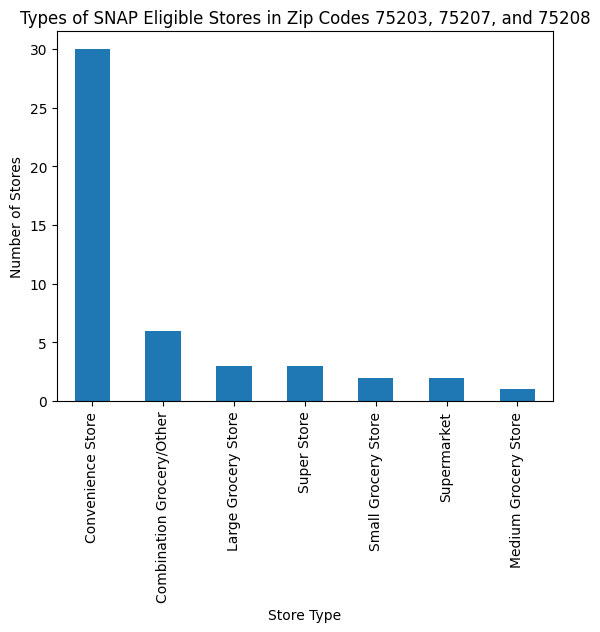

In [20]:
#creating visual of the types of stores and sorting by length of the bars
oak_cliff_competition_grouped = oak_cliff_competition.groupby(by='Store Type').count()
oak_cliff_competition_sorted = oak_cliff_competition_grouped.sort_values(by = "Store Name", ascending = False)
oak_cliff_graph = oak_cliff_competition_sorted['Store Name'].plot.bar()

oak_cliff_graph.set_title('Types of SNAP Eligible Stores in Zip Codes 75203, 75207, and 75208')
oak_cliff_graph.set_ylabel('Number of Stores')

In [21]:
dallas_SNAP_stores["Store Type"].unique()

array(['Convenience Store', 'Combination Grocery/Other', 'Super Store',
       'Small Grocery Store', 'Medium Grocery Store', 'Supermarket',
       'Large Grocery Store', "Farmers' Market", 'Meat/Poultry Specialty',
       'Fruits/Veg Specialty', 'Bakery Specialty', 'Delivery Route'],
      dtype=object)

In [22]:
dallas_SNAP_stores

,Record ID,Store Name,Store Type,Street Number,Street Name,Additional Address,City,State,Zip Code,Zip4,County,Latitude,Longitude,Authorization Date,End Date
857798,1408751,1 Quickstop,Convenience Store,3525,W Ledbetter Dr,NaN,Dallas,TX,75233,3809,DALLAS,32.69171,-96.87895,06/18/2020,
857799,1442210,1 St Stop,Convenience Store,4100,Gus Thomasson Rd,NaN,Mesquite,TX,75150,2226,DALLAS,32.82010,-96.64152,04/07/2021,
857800,1087515,1 Star Beverage,Combination Grocery/Other,510,N Plano Rd,,Garland,TX,75042,5908,DALLAS,32.91725,-96.70021,03/01/2013,
857816,1366471,1 Stop Mart,Convenience Store,8460,Denton Dr,,Dallas,TX,75235,3135,DALLAS,32.84155,-96.85843,06/14/2019,
857827,1467104,1st Choice Grocery,Convenience Store,8122,Forest Ln,Ste A,Dallas,TX,75243,3949,DALLAS,32.90894,-96.76462,09/15/2021,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
864409,776038,ZAM ZAM SUPERMARKET,Large Grocery Store,3901,W Northgate Dr,,Irving,TX,75062,1954,DALLAS,32.85711,-97.00259,03/06/2006,
864412,1443631,Zara Food Mart,Convenience Store,1102,E Pioneer Dr,Ste H,Irving,TX,75061,7862,DALLAS,32.81713,-96.93340,04/07/2021,
864419,1488443,Zee Stop Town East Mall 04,Convenience Store,2063,Town East Mall,NaN,Mesquite,TX,75150,4197,DALLAS,32.80852,-96.62629,03/02/2022,
864423,1402593,Zing Oriental Market,Medium Grocery Store,9658,Plano Rd,,Dallas,TX,75238,2923,DALLAS,32.87830,-96.70028,04/09/2020,


In [23]:
#filtering out Farmers' Market, Meat/Poultry Specialty, Fruits/Veg Specialty, Bakery Specialty, Delivery Route
store_type = ['Convenience Store', 'Combination Grocery/Other', 'Super Store',
       'Small Grocery Store', 'Medium Grocery Store', 'Supermarket',
       'Large Grocery Store']

dallas_SNAP_stores_filtered = dallas_SNAP_stores[dallas_SNAP_stores["Store Type"].isin(store_type)]
dallas_SNAP_stores_filtered
        

,Record ID,Store Name,Store Type,Street Number,Street Name,Additional Address,City,State,Zip Code,Zip4,County,Latitude,Longitude,Authorization Date,End Date
857798,1408751,1 Quickstop,Convenience Store,3525,W Ledbetter Dr,NaN,Dallas,TX,75233,3809,DALLAS,32.69171,-96.87895,06/18/2020,
857799,1442210,1 St Stop,Convenience Store,4100,Gus Thomasson Rd,NaN,Mesquite,TX,75150,2226,DALLAS,32.82010,-96.64152,04/07/2021,
857800,1087515,1 Star Beverage,Combination Grocery/Other,510,N Plano Rd,,Garland,TX,75042,5908,DALLAS,32.91725,-96.70021,03/01/2013,
857816,1366471,1 Stop Mart,Convenience Store,8460,Denton Dr,,Dallas,TX,75235,3135,DALLAS,32.84155,-96.85843,06/14/2019,
857827,1467104,1st Choice Grocery,Convenience Store,8122,Forest Ln,Ste A,Dallas,TX,75243,3949,DALLAS,32.90894,-96.76462,09/15/2021,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
864409,776038,ZAM ZAM SUPERMARKET,Large Grocery Store,3901,W Northgate Dr,,Irving,TX,75062,1954,DALLAS,32.85711,-97.00259,03/06/2006,
864412,1443631,Zara Food Mart,Convenience Store,1102,E Pioneer Dr,Ste H,Irving,TX,75061,7862,DALLAS,32.81713,-96.93340,04/07/2021,
864419,1488443,Zee Stop Town East Mall 04,Convenience Store,2063,Town East Mall,NaN,Mesquite,TX,75150,4197,DALLAS,32.80852,-96.62629,03/02/2022,
864423,1402593,Zing Oriental Market,Medium Grocery Store,9658,Plano Rd,,Dallas,TX,75238,2923,DALLAS,32.87830,-96.70028,04/09/2020,


In [25]:
dallas_SNAP_stores_filtered["Store Type"].unique()

array(['Convenience Store', 'Combination Grocery/Other', 'Super Store',
       'Small Grocery Store', 'Medium Grocery Store', 'Supermarket',
       'Large Grocery Store'], dtype=object)

In [26]:
#creating dataframe with just the convenience stores in Dallas
dallas_convenience_stores = dallas_SNAP_stores_filtered[dallas_SNAP_stores_filtered["Store Type"] == 'Convenience Store']
dallas_convenience_stores.to_csv('dallas_convenience_stores.csv')

In [27]:
#creating dataframe with all groceries (ie no grocery)
dallas_grocery_stores = dallas_SNAP_stores_filtered[dallas_SNAP_stores_filtered["Store Type"] != 'Convenience Store']
dallas_grocery_stores

,Record ID,Store Name,Store Type,Street Number,Street Name,Additional Address,City,State,Zip Code,Zip4,County,Latitude,Longitude,Authorization Date,End Date
857800,1087515,1 Star Beverage,Combination Grocery/Other,510,N Plano Rd,,Garland,TX,75042,5908,DALLAS,32.91725,-96.70021,03/01/2013,
858366,1157354,7-Eleven Convenience Store 35832A,Combination Grocery/Other,2711,Mckinney Ave,,Dallas,TX,75204,8629,DALLAS,32.79804,-96.80130,07/24/2014,
858600,1120712,99 Cent Only Store 2879,Combination Grocery/Other,410,E Camp Wisdom Rd,,Duncanville,TX,75116,2708,DALLAS,32.66191,-96.90225,10/25/2013,
858602,592564,99 CENTS ONLY STORE 2821,Combination Grocery/Other,950,W Centerville Rd,,Garland,TX,75041,5823,DALLAS,32.85942,-96.64442,01/14/2004,
858603,617006,99 CENTS ONLY STORE 2822,Combination Grocery/Other,1445,W Buckingham Rd,NaN,Garland,TX,75040,,DALLAS,32.93182,-96.64998,03/18/2004,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
864380,1208173,World Of Spices,Medium Grocery Store,13340,Audelia Rd,Ste 136,Dallas,TX,75243,2472,DALLAS,32.93068,-96.71794,09/30/2015,
864382,673886,Wrights Family Food,Combination Grocery/Other,1050,S Belt Line Rd,,Dallas,TX,75253,5001,DALLAS,32.68700,-96.58918,04/17/2002,
864409,776038,ZAM ZAM SUPERMARKET,Large Grocery Store,3901,W Northgate Dr,,Irving,TX,75062,1954,DALLAS,32.85711,-97.00259,03/06/2006,
864423,1402593,Zing Oriental Market,Medium Grocery Store,9658,Plano Rd,,Dallas,TX,75238,2923,DALLAS,32.87830,-96.70028,04/09/2020,


In [28]:
dallas_grocery_stores

,Record ID,Store Name,Store Type,Street Number,Street Name,Additional Address,City,State,Zip Code,Zip4,County,Latitude,Longitude,Authorization Date,End Date
857800,1087515,1 Star Beverage,Combination Grocery/Other,510,N Plano Rd,,Garland,TX,75042,5908,DALLAS,32.91725,-96.70021,03/01/2013,
858366,1157354,7-Eleven Convenience Store 35832A,Combination Grocery/Other,2711,Mckinney Ave,,Dallas,TX,75204,8629,DALLAS,32.79804,-96.80130,07/24/2014,
858600,1120712,99 Cent Only Store 2879,Combination Grocery/Other,410,E Camp Wisdom Rd,,Duncanville,TX,75116,2708,DALLAS,32.66191,-96.90225,10/25/2013,
858602,592564,99 CENTS ONLY STORE 2821,Combination Grocery/Other,950,W Centerville Rd,,Garland,TX,75041,5823,DALLAS,32.85942,-96.64442,01/14/2004,
858603,617006,99 CENTS ONLY STORE 2822,Combination Grocery/Other,1445,W Buckingham Rd,NaN,Garland,TX,75040,,DALLAS,32.93182,-96.64998,03/18/2004,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
864380,1208173,World Of Spices,Medium Grocery Store,13340,Audelia Rd,Ste 136,Dallas,TX,75243,2472,DALLAS,32.93068,-96.71794,09/30/2015,
864382,673886,Wrights Family Food,Combination Grocery/Other,1050,S Belt Line Rd,,Dallas,TX,75253,5001,DALLAS,32.68700,-96.58918,04/17/2002,
864409,776038,ZAM ZAM SUPERMARKET,Large Grocery Store,3901,W Northgate Dr,,Irving,TX,75062,1954,DALLAS,32.85711,-97.00259,03/06/2006,
864423,1402593,Zing Oriental Market,Medium Grocery Store,9658,Plano Rd,,Dallas,TX,75238,2923,DALLAS,32.87830,-96.70028,04/09/2020,


In [29]:
dallas_grocery_stores.to_csv('dallas_grocery_stores.csv')

In [30]:
houston_SNAP_stores = texas_SNAP_stores[texas_SNAP_stores['County']=="HARRIS"]
houston_SNAP_stores

,Record ID,Store Name,Store Type,Street Number,Street Name,Additional Address,City,State,Zip Code,Zip4,County,Latitude,Longitude,Authorization Date,End Date
873798,1568247,#1 Mi Tierra El Salvador,Convenience Store,4422,W Orem Dr,NaN,Houston,TX,77045,4311,HARRIS,29.62854,-95.44527,11/07/2023,
873804,1486630,1 Dollar Plus,Convenience Store,12313,Bellaire Blvd,Ste Q,Houston,TX,77072,2254,HARRIS,29.70304,-95.59699,02/11/2022,
873810,1478958,1 Stop #10,Convenience Store,7112,N Wayside Dr,NaN,Houston,TX,77028,3242,HARRIS,29.82673,-95.28393,02/01/2022,
873811,1478964,1 Stop #11,Convenience Store,4203,Fairmont Pkwy,NaN,Pasadena,TX,77504,3324,HARRIS,29.65079,-95.17884,01/12/2022,
873812,1512665,1 Stop #14,Convenience Store,390,Aldine Bender Rd,NaN,Houston,TX,77060,4402,HARRIS,29.93143,-95.39578,09/09/2022,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
888845,1400685,Zip In Zip Out,Convenience Store,12951,Hiram Clarke Rd,NaN,Houston,TX,77045,3202,HARRIS,29.63824,-95.44565,04/21/2020,
888846,1531607,Zip In Zip Out,Convenience Store,8765,Howard Dr,NaN,Houston,TX,77017,3825,HARRIS,29.68872,-95.24969,01/25/2023,
888847,1478749,Zip In Zip Out #7,Convenience Store,8141,N Main St,NaN,Baytown,TX,77521,9704,HARRIS,29.81949,-94.96829,12/06/2021,
888852,1285452,Zip N,Convenience Store,85,E Edgebrook Dr,,Houston,TX,77034,1408,HARRIS,29.64898,-95.21960,01/18/2023,


In [31]:
houston_SNAP_stores_filtered = houston_SNAP_stores[houston_SNAP_stores["Store Type"].isin(store_type)]
houston_SNAP_stores_filtered

,Record ID,Store Name,Store Type,Street Number,Street Name,Additional Address,City,State,Zip Code,Zip4,County,Latitude,Longitude,Authorization Date,End Date
873798,1568247,#1 Mi Tierra El Salvador,Convenience Store,4422,W Orem Dr,NaN,Houston,TX,77045,4311,HARRIS,29.62854,-95.44527,11/07/2023,
873804,1486630,1 Dollar Plus,Convenience Store,12313,Bellaire Blvd,Ste Q,Houston,TX,77072,2254,HARRIS,29.70304,-95.59699,02/11/2022,
873810,1478958,1 Stop #10,Convenience Store,7112,N Wayside Dr,NaN,Houston,TX,77028,3242,HARRIS,29.82673,-95.28393,02/01/2022,
873811,1478964,1 Stop #11,Convenience Store,4203,Fairmont Pkwy,NaN,Pasadena,TX,77504,3324,HARRIS,29.65079,-95.17884,01/12/2022,
873812,1512665,1 Stop #14,Convenience Store,390,Aldine Bender Rd,NaN,Houston,TX,77060,4402,HARRIS,29.93143,-95.39578,09/09/2022,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
888845,1400685,Zip In Zip Out,Convenience Store,12951,Hiram Clarke Rd,NaN,Houston,TX,77045,3202,HARRIS,29.63824,-95.44565,04/21/2020,
888846,1531607,Zip In Zip Out,Convenience Store,8765,Howard Dr,NaN,Houston,TX,77017,3825,HARRIS,29.68872,-95.24969,01/25/2023,
888847,1478749,Zip In Zip Out #7,Convenience Store,8141,N Main St,NaN,Baytown,TX,77521,9704,HARRIS,29.81949,-94.96829,12/06/2021,
888852,1285452,Zip N,Convenience Store,85,E Edgebrook Dr,,Houston,TX,77034,1408,HARRIS,29.64898,-95.21960,01/18/2023,


In [32]:
#following code blocks creating convenience stores and grocery stores for the top 5 cities in Texas
houston_convenience_stores = houston_SNAP_stores_filtered[houston_SNAP_stores_filtered["Store Type"] == 'Convenience Store']
houston_grocery_stores = houston_SNAP_stores_filtered[houston_SNAP_stores_filtered["Store Type"] != 'Convenience Store']
# houston_grocery_stores["Store Type"] = "Grocery Store"
houston_convenience_stores.to_csv('houston_convenience_stores.csv')
houston_grocery_stores.to_csv('houston_grocery_stores.csv')

In [33]:
fort_worth_SNAP_stores = texas_SNAP_stores[texas_SNAP_stores['County']=="TARRANT"]
fort_worth_SNAP_stores_filtered = fort_worth_SNAP_stores[fort_worth_SNAP_stores["Store Type"].isin(store_type)]
fort_worth_convenience_stores = fort_worth_SNAP_stores_filtered[fort_worth_SNAP_stores_filtered["Store Type"] == 'Convenience Store']
fort_worth_grocery_stores = fort_worth_SNAP_stores_filtered[fort_worth_SNAP_stores_filtered["Store Type"] != 'Convenience Store']
# fort_worth_grocery_stores["Store Type"] = "Grocery Store"
fort_worth_convenience_stores.to_csv('fort_worth_convenience_stores.csv')
fort_worth_grocery_stores.to_csv('fort_worth_grocery_stores.csv')

In [34]:
san_antonio_SNAP_stores = texas_SNAP_stores[texas_SNAP_stores['County']=="BEXAR"]
san_antonio_SNAP_stores_filtered = san_antonio_SNAP_stores[san_antonio_SNAP_stores["Store Type"].isin(store_type)]
san_antonio_convenience_stores = san_antonio_SNAP_stores_filtered[san_antonio_SNAP_stores_filtered["Store Type"] == 'Convenience Store']
san_antonio_grocery_stores = san_antonio_SNAP_stores_filtered[san_antonio_SNAP_stores_filtered["Store Type"] != 'Convenience Store']
# san_antonio_grocery_stores["Store Type"] = "Grocery Store"
san_antonio_convenience_stores.to_csv('san_antonio_convenience_stores.csv')
san_antonio_grocery_stores.to_csv('san_antonio_grocery_stores.csv')

In [35]:
austin_SNAP_stores = texas_SNAP_stores[texas_SNAP_stores['County']=="TRAVIS"]
austin_SNAP_stores_filtered = austin_SNAP_stores[austin_SNAP_stores["Store Type"].isin(store_type)]
austin_convenience_stores = austin_SNAP_stores_filtered[austin_SNAP_stores_filtered["Store Type"] == 'Convenience Store']
austin_grocery_stores = austin_SNAP_stores_filtered[austin_SNAP_stores_filtered["Store Type"] != 'Convenience Store']
# austin_grocery_stores["Store Type"] = "Grocery Store"
austin_convenience_stores.to_csv('austin_convenience_stores.csv')
austin_grocery_stores.to_csv('austin_grocery_stores.csv')

In [36]:
#list of grocery stores that do not include dollar stores (this isn't perfect, as some small grocery stores
#fall under combination/other, as well as some dollar stores still under other grocery types)
dallas_real_grocery = dallas_grocery_stores[dallas_grocery_stores["Store Type"]!="Combination Grocery/Other"]
dallas_real_grocery.to_csv('dallas_real_grocery.csv')

In [37]:
#list of dollar stores
dallas_dollar_stores = dallas_grocery_stores[dallas_grocery_stores["Store Type"]=="Combination Grocery/Other"]
dallas_dollar_stores.to_csv('dallas_dollar_stores.csv')